In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
from kid_readout.analysis.timeseries import decimating_fir

In [2]:
s = np.random.randn(2**20)

In [3]:
coeff = np.zeros((32,))
coeff[16] = 1.0

In [5]:
fir = decimating_fir.FIR1D(coeff)
delay = decimating_fir.Delay1D(1.0,32)

In [15]:
yfir = fir.apply(s*2)
ydel = delay.apply(s*2)

In [16]:
np.allclose(yfir,ydel)

True

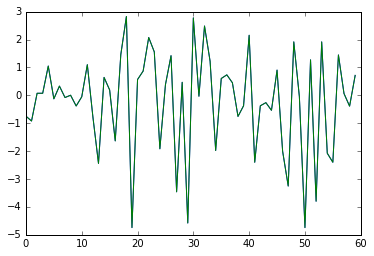

In [17]:
plot(yfir[:60])
plot(ydel[:60])

In [31]:
mshb = decimating_fir.MultistageHalfBandDecimationFilter(np.ones((1,),dtype='int')*64)

In [32]:
pp = mshb.polyphase(s)
naive = mshb.naive(s)

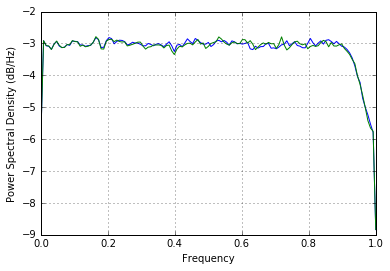

In [33]:
_=psd(pp)
_=psd(naive)

In [35]:
coeffs = mshb.filters[0].coeff

In [97]:
a = np.zeros((128,))
a[1] = 1
#a[1]=2

In [67]:
hbf = decimating_fir.HalfBandFilter()

In [98]:
naive= hbf.naive(a)#[2::2]
pp = hbf.polyphase(a)[:-1]
#np.allclose(naive,pp)

In [100]:
naive[2::2].argmax(),pp.argmax()

(3, 3)

In [89]:
hbf.coeff[:8]

array([ 0.        , -0.00139121,  0.        ,  0.012961  ,  0.        ,
       -0.06170753,  0.        ,  0.30013946], dtype=float32)

In [87]:
pp[1]

0.012961004860699177

In [86]:
naive[4]

0.012961004860699177

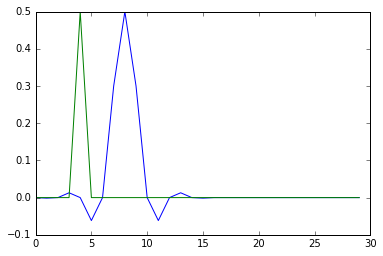

In [70]:
plot(naive[:30])
plot(pp[:30])